In [1]:
import os
import pandas as pd
import pickle
import requests
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
# 到資料區間路徑
os.chdir("taitra_all")

## Feature to array

In [25]:
df = pd.read_csv('表格資料_edit_thumbnails.csv',encoding='utf-8-sig')
# y
impressions = df.loc[:,"impressions"].values
views = df.loc[:,"views"].values
watchtimes = df.loc[:,"watchtimes(hr)"].values*3600
#x
contrast = df.loc[:,"contrast"].values.reshape((len(df),1))
wcag_contrast = df.loc[:,"wcag_contrast"].values.reshape((len(df),1))
colorful = df.loc[:,"colorfulness"].values.reshape((len(df),1))
bertscore = df.loc[:,"f1-score"].values.reshape((len(df),1))
product_encode = df.loc[:,"product_encode"].values.reshape((len(df),1))
form_encode = df.loc[:,"form_encode"].values.reshape((len(df),1))
thumbnail_text_len = df.loc[:,"thumbnail_text_len"].values.reshape((len(df),1))

features = df.loc[:,"contrast":"thumbnail_text_len"].drop(columns=["colors","proportion","hsv_colors","form","p-score","r-score","product","form"])

print(contrast.shape,
      wcag_contrast.shape,
      colorful.shape,
      features.shape,
      impressions.shape,
      watchtimes.shape,
      views.shape)

(344, 1) (344, 1) (344, 1) (344, 7) (344,) (344,) (344,)


<h1 style="text-align:center"><b>ML</b></h1>

## PCA

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

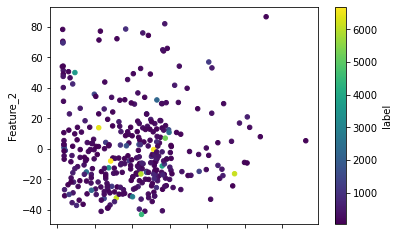

In [4]:
def pca(features, n):
    pca = PCA(n_components = n, random_state=42)
    dw_features = pca.fit_transform(features)
    return dw_features

X_pca = pca(features, 3)
df = pd.DataFrame({"Feature_1":X_pca[:,0],"Feature_2":X_pca[:,1], "label":impressions})
df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='viridis')

C:\pyenv\py37env01\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  if __name__ == '__main__':
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


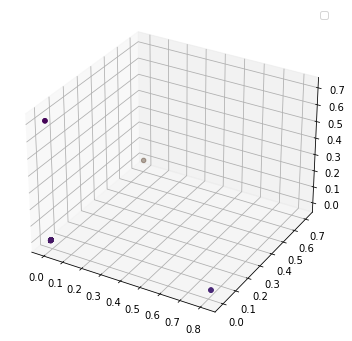

In [5]:
dw_features = KernelPCA(n_components=3, kernel='rbf').fit_transform(features)
df = pd.DataFrame({
            "Feature_1":dw_features[:,0],
            "Feature_2":dw_features[:,1], 
            "Feature_3":dw_features[:,2],
            "label":impressions
            })
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection = '3d')
x = df["Feature_1"]
y = df["Feature_2"]
z = df["Feature_3"]
ax.scatter(x, y, z, c = df["label"])
ax.legend()
plt.show()

## T-SNE

C:\pyenv\py37env01\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\pyenv\py37env01\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the cur

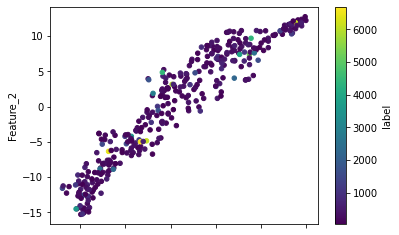

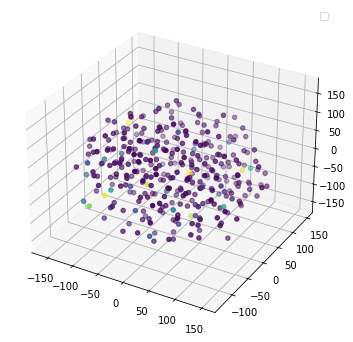

array([[-108.327095,   50.55267 ,   17.680656],
       [ -92.81598 ,  -70.615135, -114.002914],
       [ -64.010765,  -48.18656 ,  -28.667046],
       ...,
       [ -77.82776 ,   76.680725,   28.389635],
       [  56.82412 ,  -90.7241  ,  -11.652017],
       [ -67.92411 ,  -29.939293,  -63.926594]], dtype=float32)

In [6]:
def tsne_2d(features, perplexity=50,plot=False):
    X_tsne = TSNE(n_components=2, perplexity=perplexity,random_state=42).fit_transform(features)
    if plot == True:
        df = pd.DataFrame({"Feature_1":X_tsne[:,0],"Feature_2":X_tsne[:,1], "label":impressions})
        df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='viridis')
    return X_tsne

def tsne_3d(features, perplexity=50,plot=False):
    X_tsne = TSNE(n_components=3, perplexity=perplexity,random_state=42).fit_transform(features)
    if plot == True:
        df = pd.DataFrame({
            "Feature_1":X_tsne[:,0],
            "Feature_2":X_tsne[:,1], 
            "Feature_3":X_tsne[:,2],
            "label":impressions
            })
        fig = plt.figure(figsize=(10,6))
        ax = fig.gca(projection = '3d')
        x = df["Feature_1"]
        y = df["Feature_2"]
        z = df["Feature_3"]
        ax.scatter(x, y, z, c = df["label"])
        ax.legend()
        plt.show()
    return X_tsne
tsne_2d(features, perplexity=50,plot = True)
tsne_3d(features, perplexity=50,plot = True)

## binary

In [7]:
def label_binary(label):
    label_avg = sum(label)/len(label)
    label_bi = label.copy()
    label_bi[label_bi<label_avg] = 0
    label_bi[label_bi>=label_avg] = 1
    return label_bi

impressions_bi = label_binary(impressions)
views_bi = label_binary(views)
watchtimes_bi = label_binary(watchtimes)

## plot func

In [8]:
def plt3d(dw_feats,color):
    fig = plt.figure(figsize=(10,6))
    ax = fig.gca(projection = '3d')
    x = dw_feats[:,0]
    y = dw_feats[:,1]
    z = dw_feats[:,2]
    ax.scatter(x, y, z, c = color)
    ax.legend()
    plt.show()

def plt2d(dw_feats,color):
    plt.scatter(dw_feats[:, 0], dw_feats[:, 1], c = color)
    plt.show()

## **Model**
- K-Means
- Logistic Regression
- Decission tree
- SVM
- XGBoost

## K-Means
- <font color=white> 將無 target 的純特徵向量做 unsupervised learning, 觀察不同 k 值 clustering 結果 </font>

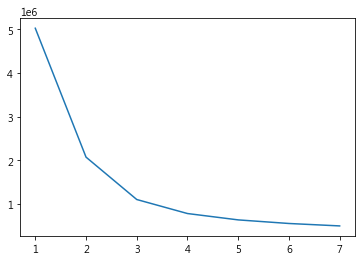

In [53]:
def cluster_label(n_cluster, label):
    for n in range(n_clusters):
        indexs = np.where(y_pred==n)
        for index in indexs:
            print(f"cluster {n} average: {np.mean(label[index])}")
    return
    
def draw_cluster_label(y_pred, label):
    plt.scatter(y_pred, label, c = y_pred)
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False
    plt.xlabel("分群編號")
    plt.ylabel("label")
    plt.xticks(y_pred)
    plt.show()
    return
    
MSE=[]
for n_clusters in range(1,8):
#     dw_feats = tsne_2d(features)
    dw_feats = features
    kmeans = KMeans(n_clusters = n_clusters,  random_state=42).fit(dw_feats)
    y_pred = kmeans.predict(dw_feats)
    MSE.append(kmeans.inertia_)
            
plt.plot(range(1,8),MSE)
plt.show()

#     unique, counts = np.unique(y_pred[:], return_counts=True)
#     print(dict(zip(unique, counts)))
#     cluster_label(n_clusters, impressions)   
#     draw_cluster_label(y_pred, impressions)

{0: 27, 1: 93, 2: 145, 3: 79}
cluster 0 average: 556.074074074074
cluster 1 average: 548.236559139785
cluster 2 average: 547.1448275862069
cluster 3 average: 430.8987341772152


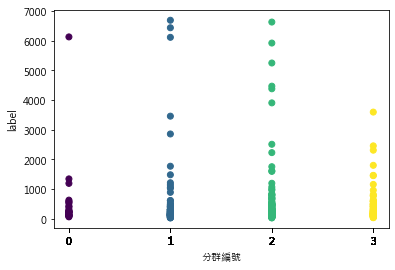

contrast
cluster 0 average: 69.41921111290884
cluster 1 average: 64.85870689791824
cluster 2 average: 64.30885907676411
cluster 3 average: 61.50981622307284


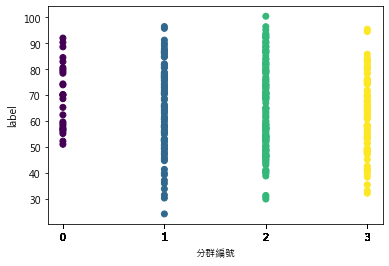

wcag_contrast
cluster 0 average: 10.056113256392473
cluster 1 average: 9.699822493295146
cluster 2 average: 9.842445446585806
cluster 3 average: 8.549242091021261


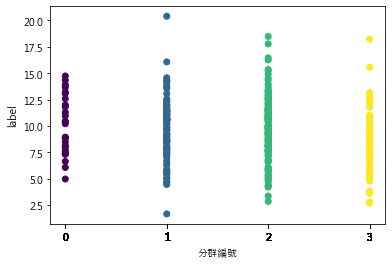

colorfulness
cluster 0 average: 42.159240833565676
cluster 1 average: 44.701160674814695
cluster 2 average: 43.392281363170945
cluster 3 average: 58.09606548029562


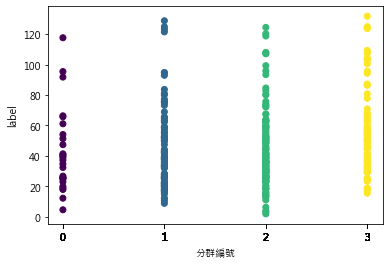

f1-score
cluster 0 average: 0.6058722077777778
cluster 1 average: 0.6331976722580647
cluster 2 average: 0.6156648017931033
cluster 3 average: 0.4680860629113924


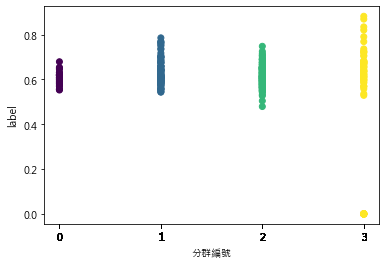

product_encode
cluster 0 average: 7.074074074074074
cluster 1 average: 10.32258064516129
cluster 2 average: 10.524137931034483
cluster 3 average: 8.632911392405063


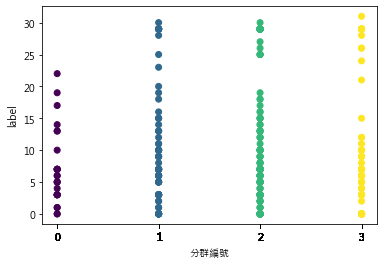

form_encode
cluster 0 average: 0.9629629629629629
cluster 1 average: 1.075268817204301
cluster 2 average: 0.9586206896551724
cluster 3 average: 0.7215189873417721


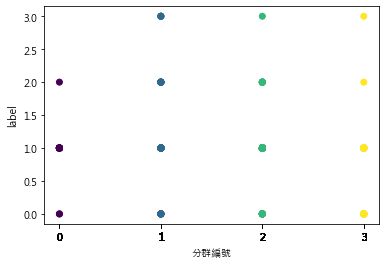

thumbnail_text_len
cluster 0 average: 438.48148148148147
cluster 1 average: 139.93548387096774
cluster 2 average: 246.05517241379312
cluster 3 average: 35.44303797468354


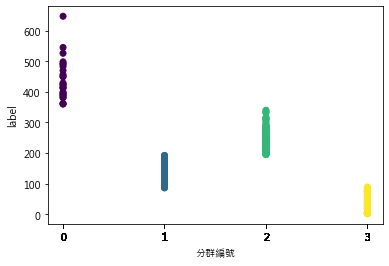

cluster 0 average: 3984.6799999999994
cluster 1 average: 2787.8012903225804
cluster 2 average: 3443.526620689655
cluster 3 average: 3986.4258227848118


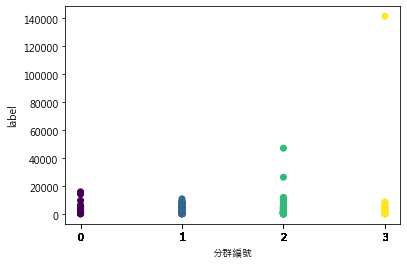

In [54]:
dw_feats = features
n_clusters = 4

kmeans = KMeans(n_clusters,  random_state=42).fit(dw_feats)
y_pred = kmeans.predict(dw_feats)
unique, counts = np.unique(y_pred[:], return_counts=True)
print(dict(zip(unique, counts)))
cluster_label(n_clusters, impressions)   
draw_cluster_label(y_pred, impressions)

for i in range(7):
    print(features.keys()[i])
    cluster_label(n_clusters, features.iloc[:,i])   
    draw_cluster_label(y_pred, features.iloc[:,i])

cluster_label(n_clusters, watchtimes)   
draw_cluster_label(y_pred, watchtimes)

## Logistic Regression

Accuracy: 0.684 (0.036)
0.7101449275362319
訓練集:  0.68
測試集:  0.7101449275362319
contrast, Score: -0.00609
wcag_contrast, Score: 0.02290
colorfulness, Score: 0.00003
f1-score, Score: -1.30353
product_encode, Score: -0.01782
form_encode, Score: -0.02409
thumbnail_text_len, Score: 0.00297


C:\pyenv\py37env01\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


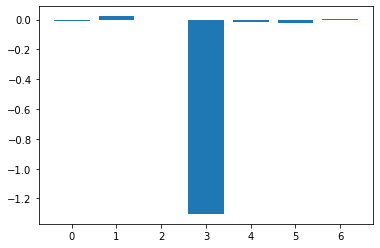

C:\pyenv\py37env01\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\pyenv\py37env01\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ex

0.7536231884057971
訓練集:  0.6763636363636364
測試集:  0.7536231884057971
contrast, Score: -0.00304
wcag_contrast, Score: -0.05199
colorfulness, Score: -0.00381
f1-score, Score: -1.64177
product_encode, Score: 0.00016
form_encode, Score: -0.14369
thumbnail_text_len, Score: 0.00310


C:\pyenv\py37env01\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


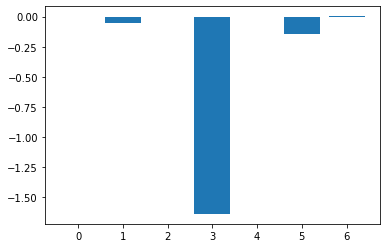

C:\pyenv\py37env01\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\pyenv\py37env01\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ex

In [56]:
# X = pca(features, n = 3)
# X = tsne_3d(features)
X = features
y = views_bi

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

model = LogisticRegression()
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y,  scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

max_score = 0.7
for train_index, test_index in cv.split(X_std):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    score = model.score(X_test,y_test)
    if score > max_score:
        max_score = score
        print(score)
        print('訓練集: ',model.score(X_train,y_train))
        print('測試集: ', score)
        with open("model/LRC_%.2f.pickle"%score, "wb") as file:
            pickle.dump(model, file)
        file.close()
        
        importance = model.coef_[0]
        for i,j in enumerate(importance):
            print(f'{features.keys()[i]}, Score: %.5f' %j )

        plt.bar([X for X in range(len(importance))], importance)
        plt.show()

## svm
<font color=white>將特徵向量與 target 做 svm regression</font>

C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

LinearSVR(C=15)


C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

-0.22 accuracy with a standard deviation of 0.24


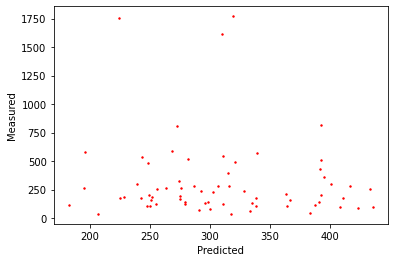

SVR(C=15, kernel='linear')
-0.09 accuracy with a standard deviation of 0.03


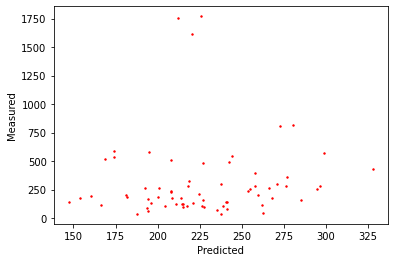

SVR(C=15, gamma=0.7)
-0.09 accuracy with a standard deviation of 0.03


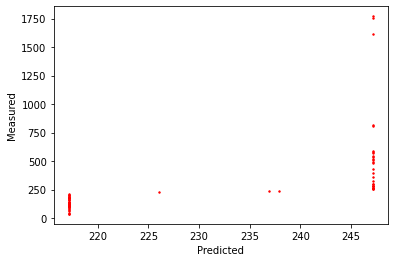

SVR(C=15, kernel='poly')
-0.09 accuracy with a standard deviation of 0.04


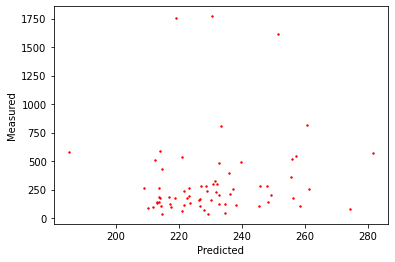

In [31]:
# dw_feats = pca(features, n = 2)
# dw_feats = tsne_2d(features,50)
# dw_features = KernelPCA(n_components=2, kernel='rbf').fit_transform(features)
dw_feats = features
label = impressions

models = (svm.LinearSVR(C=15),
          svm.SVR(kernel='linear', C=15),
          svm.SVR(kernel='rbf', gamma=0.7, C=15),
          svm.SVR(kernel='poly', C=15))

models = (model.fit(dw_feats, impressions) for model in models)
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
for model in models:
    print(model)
    scores = cross_val_score(model, dw_feats, label, cv=cv)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

    for train_index, test_index in cv.split(dw_feats):
        X_train, X_test = dw_feats.iloc[train_index], dw_feats.iloc[test_index]
        y_train, y_test = label[train_index], impressions[test_index]
        pred = model.predict(X_test)
    plt.scatter(pred,y_test,c='r', s=2)
    plt.xlabel('Predicted')
    plt.ylabel('Measured')
    plt.show()

In [36]:
# dw_feats = pca(features, n = 3)
# dw_feats = tsne_2d(features,50)
dw_feats = features
y = views_bi
models = (svm.LinearSVC(C=10),
          svm.SVC(kernel='rbf', gamma=0.7, C=10),
          svm.SVC(kernel='poly', C=10))

models = (model.fit(dw_feats, y) for model in models)
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
max_score = 0.7
for model in models:
    print(model)
    scores = cross_val_score(model, dw_feats, views_bi, cv=cv)
    print("Accuracy(std)%0.2f(%0.2f)" % (scores.mean(), scores.std()))
    
    for train_index, test_index in cv.split(dw_feats):
        X_train, X_test = dw_feats.iloc[train_index], dw_feats.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        score = model.score(X_test, y_test)
        if score > max_score:
            with open(f"model/{model}_%.2f.pkl"%score,"wb") as file:
                pickle.dump(model,file)

C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

LinearSVC(C=10)


C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\pyenv\py37env01\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

Accuracy(std)0.62(0.09)
SVC(C=10, gamma=0.7)
Accuracy(std)0.69(0.04)
SVC(C=10, kernel='poly')
Accuracy(std)0.68(0.03)


## Decision tree

In [ ]:
import os 
os.environ["PATH"] += os.pathsep + "C:\Users\x0933\taitraYT\Lib\site-packages\pygments\lexers\graphviz.py"

[ -1.6824472   -0.39210201  -0.44651311  -0.4732976   -1.30198318
  -2.15402202  -0.77038213  -0.75642486 -25.28953789  -0.46062975
  -0.24157126  -2.50364688  -0.57437225  -0.51668787  -8.13209296]
-3.05 accuracy with a standard deviation of 6.24
訓練集:  1.0
測試集:  -1.682447202317047
訓練集:  1.0
測試集:  -0.3921020055831266
訓練集:  1.0
測試集:  -0.4465131115795593
訓練集:  1.0
測試集:  -0.47329759974592966
訓練集:  1.0
測試集:  -1.3019831806576487
訓練集:  1.0
測試集:  -2.1540220208141148
訓練集:  1.0
測試集:  -0.7703821336096064
訓練集:  1.0
測試集:  -0.75642485801129
訓練集:  1.0
測試集:  -25.289537885030594
訓練集:  1.0
測試集:  -0.46062975452531685
訓練集:  1.0
測試集:  -0.2415712637628824
訓練集:  1.0
測試集:  -2.5036468758306314
訓練集:  1.0
測試集:  -0.574372249282072
訓練集:  1.0
測試集:  -0.5166878737455196
訓練集:  1.0
測試集:  -8.132092961205416


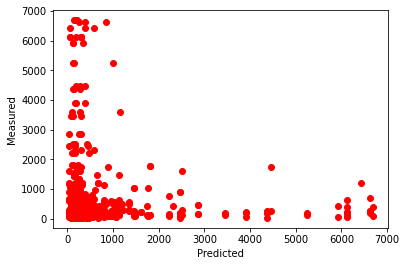

In [37]:
# X = pca(features,3)
# X = tsne_2d(features,50)
# X = KernelPCA(n_components=3, kernel='rbf').fit_transform(features)
X = features
y = impressions
dtr = DecisionTreeRegressor(max_features=1,random_state=42)

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(dtr, X, y, cv=cv)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dtr.fit(X_train, y_train)
    pridicted_tr = dtr.predict(X_train)
    pridicted_te = dtr.predict(X_test)
    print('訓練集: ', dtr.score(X_train,y_train))
    print('測試集: ', dtr.score(X_test,y_test))
    plt.scatter(pridicted_te,y_test,c='r')
    plt.xlabel('Predicted')
    plt.ylabel('Measured')
    plt.show

In [77]:
from sklearn.tree import DecisionTreeClassifier
# dw_feats = pca(features,5)
dw_feats = features
y = views_bi
model = DecisionTreeClassifier()

# define model evaluation method
cv = RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, dw_feats, y, scoring = "accuracy", cv=cv)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

max_score = 0.7
for train_index, test_index in cv.split(dw_feats):
    X_train, X_test = dw_feats.iloc[train_index], dw_feats.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print(score)
    if score > max_score:
        max_score = score
        with open("model/DTC_%.2f.pickle"%score,"wb") as file:
            pickle.dump(model,file)
        print(pred, y_test)

[0.58       0.75510204 0.65306122 0.73469388 0.57142857 0.59183673
 0.71428571 0.46       0.59183673 0.71428571 0.59183673 0.59183673
 0.63265306 0.59183673 0.54       0.57142857 0.59183673 0.55102041
 0.65306122 0.48979592 0.6122449 ]
0.61 accuracy with a standard deviation of 0.07
0.62
0.7755102040816326
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 0] [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0]
0.6326530612244898
0.6326530612244898
0.46938775510204084
0.5510204081632653
0.6938775510204082
0.46
0.6122448979591837
0.673469387755102
0.6122448979591837
0.6326530612244898
0.6530612244897959
0.5510204081632653
0.54
0.5102040816326531
0.6122448979591837
0.5102040816326531
0.6530612244897959
0.4897959183673469
0.6326530612244898


## Random Forest

In [78]:
from sklearn.ensemble import BaggingClassifier
dw_feats = features
model = BaggingClassifier(n_estimators=100)

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, dw_feats, views_bi, scoring = "accuracy", cv=cv)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

max_score = 0.7
for train_index, test_index in cv.split(dw_feats):
    X_train, X_test = dw_feats.iloc[train_index], dw_feats.iloc[test_index]
    y_train, y_test = views_bi[train_index], views_bi[test_index]
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = model.score(X_test,y_test)
    if score > max_score:
        max_score = score
        with open("model/bagtree_%.2f.pickle"%score,"wb") as file:
            pickle.dump(model,file)
        print(score, pred, y_test)

[0.75362319 0.65217391 0.5942029  0.60869565 0.64705882 0.66666667
 0.65217391 0.68115942 0.65217391 0.55882353 0.66666667 0.63768116
 0.68115942 0.63768116 0.64705882]
0.65 accuracy with a standard deviation of 0.04
0.7536231884057971 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0] [0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


## XGBoost
- <font color=white>xgbregression</font>
    - n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.
    - max_depth: The maximum depth of each tree, often values are between 1 and 10.
    - eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.
    - subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.
    - colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

0.66 accuracy with a standard deviation of 0.05
訓練集:  0.8254545454545454
測試集:  0.7246376811594203


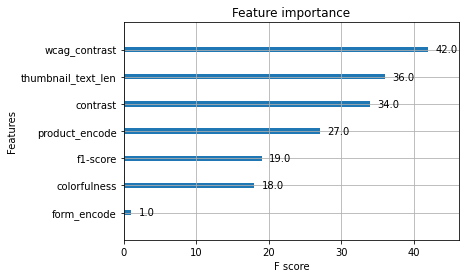

訓練集:  0.8254545454545454
測試集:  0.7391304347826086


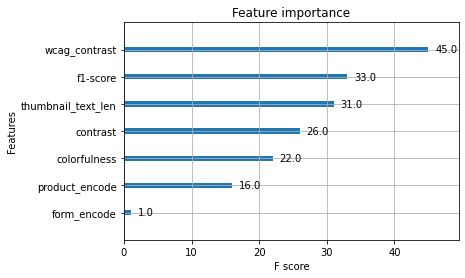

訓練集:  0.8
測試集:  0.6086956521739131
訓練集:  0.8581818181818182
測試集:  0.6956521739130435
訓練集:  0.8260869565217391
測試集:  0.6470588235294118
訓練集:  0.8363636363636363
測試集:  0.6666666666666666
訓練集:  0.84
測試集:  0.6666666666666666
訓練集:  0.8290909090909091
測試集:  0.7246376811594203
訓練集:  0.84
測試集:  0.6376811594202898
訓練集:  0.8442028985507246
測試集:  0.6176470588235294
訓練集:  0.8290909090909091
測試集:  0.6231884057971014
訓練集:  0.850909090909091
測試集:  0.6086956521739131
訓練集:  0.8436363636363636
測試集:  0.7101449275362319
訓練集:  0.8218181818181818
測試集:  0.5797101449275363
訓練集:  0.8586956521739131
測試集:  0.7205882352941176


In [55]:
#data
# X = KernelPCA(n_components=5, kernel='rbf').fit_transform(features)
# X = tsne_3d(features,50)
X = features
# scaler = StandardScaler()
# X = scaler.fit_transform(dw_feats)
# model
y = views_bi
xgb = XGBClassifier(
    n_estimators = 10,
    booster = "gbtree",
    max_depth =30,
    eta = 0.1,
    reg_lambda = 2,
    subsample = 0.7,
    colsample_bytree = 0.7,
    eval_metric=mean_squared_error
)


# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgb, X, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

max_score = 0.7
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgb.fit(X_train, y_train)
    pridicted = xgb.predict(X_test)
    score = xgb.score(X_test,y_test)
    print('訓練集: ',xgb.score(X_train,y_train))
    print('測試集: ',score)
    if score > max_score:
        max_score = score
        with open("model/xgb_%.2f.pickle"%score,"wb") as file:
            pickle.dump(xgb,file)
        plot_importance(xgb)
        plt.show()

<h1 style="text-align:center"><b> Test Model </b></h1>

In [116]:
with open("model/DTC_0.78.pickle","rb") as file:
    model = pickle.load(file)
file.close()

false = model.predict(X) - y
index = np.where( false != 0 )
print(index[0])
print(df.iloc[index[0]])
# cv = RepeatedKFold(n_splits=6, random_state=1)
# for train_index, test_index in cv.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     score = model.score(X,y)
#     print(score)

[ 29  58 112 120 162 187 204 242 261 328 329]
     index           id                                              title  \
29     116  PXG2cIyZwIU  Shizuoka Matcha Powder | SHIUAN LONG ENTERPRIS...   
58     145  N_kLT6pmdv4  Telcom and Electrical Cable | HON TRACE CORPOR...   
112    201  Y_KiDReHkAM  CNC Machining/ Ball Stud/ Rack End/ Ball Joint...   
120    211  9hx4ZzXrgg0  Nine9 indexable cutting tools | NC Spot Drill,...   
162    256  Ao4UMewcJYc  Expert of Cylinder/ Pneumatic Tube & Rods from...   
187    282  XjLFA5_HnGA  PACKAGING IN BAG FORM STANDING PACK ZIP BAG | ...   
204    299  R0MMEBCmsc0  Partico Machinery - The Best Partner Of Plasti...   
242    338  Ve6-YwNdDX4       Ming Yang Model - RC Model car & Accessories   
261    358  v4mNPXELCTg                   MAROX TOOLS INDUSTRIAL CO., LTD.   
328    425  sSiS85at4R8  Wheel | GREAT MING LEN ENTERPRISE CO., LTD. | ...   
329    426  DbsKSt8xM10  Edge Trimming Machine | JH KING INDUSTRIAL CO....   

            relea